# Serial Correlation
First, read this [Wikipedia article](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) about the Durbin-Watson statistic (just read the intro and the first section after the intro).
## Now, let's take a look at this statistic in various contexts.
### First, code up your own Durbin-Watson statistic.

In [96]:
def top(x):
    summation = 0
    for i in range(len(x)-1):
        if i > 0:
            summation += pow(x[i]-x[i-1],2)   
    print summation
    return summation

In [97]:
def bottom(x):
    summation = 0
    for i in range(len(x)-1):
        summation += pow(x[i],2)
    print summation
    return summation

In [98]:
def durbin_watson(x):
    return float(top(x))/float(bottom(x))

In [99]:
x = [1,2,3,4,4,4,4,4,4,5,6]

durbin_watson(x)

4
135


0.02962962962962963

### Now, create data that represents a linear model with noise, then fit a line to it, and see what your Durbin-Watson statistic gives for this model.
Also, plot the data and the line.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [101]:
xRow = np.linspace(0,10)
y = 2.0 * xRow + np.random.normal(loc=0.0,scale=0.1,size=len(xRow))

In [102]:
data = {"x":xRow,"y":y}
df = pd.DataFrame(data)

In [106]:
linReg = LinearRegression()
model = linReg.fit(df.x.reshape(-1,1),df.y.reshape(-1,1))
yHat = model.predict(df.x.reshape(-1,1))
residuals = y - yHat
len(y)

50

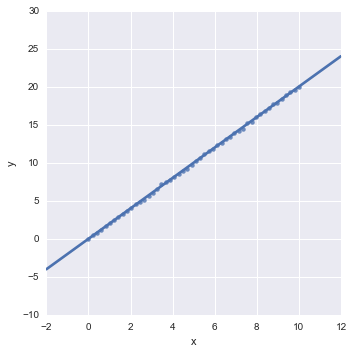

In [104]:
sns.lmplot("x","y",df)

In [105]:
d = durbin_watson(residuals)

[ 8.02477711  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711
  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711
  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711
  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711
  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711
  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711
  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711
  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711  8.02477711
  8.02477711  8.02477711]


TypeError: only length-1 arrays can be converted to Python scalars

### Now, create data that represents a quadratic model with noise, but still fit a *line* to it, and see what your Durbin-Watson statistic gives for this model.
Also, plot the data and the line.

In [ ]:
y = xRow * xRow + np.random.normal(loc=0.0,scale=0.1,size=len(xRow))

### Reflect
What does your Durbin-Watson statistic tell you about the serial correlation of the residuals in the above models?  Is this to your expectation?

When you have a pattern amongst the residuals, what does that tell you about your model?